Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts

Tasks:

1. Data Exploration and Preprocessing

    * Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
    * Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
    * Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

In [2]:
# Load the dataset
blog = pd.read_csv('/content/blogs.csv.xls')

In [3]:
# First few rows in the dataset 'blog'
blog.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
# Info on the type of data and the number columns in the loaded dataset
blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
# Check for missing or N/A entries in the dataset
blog.isnull().sum()

,0
Data,0
Labels,0


In [6]:
# Name of the colums in the dataset
blog.columns.tolist()

['Data', 'Labels']

In [7]:
# A glimpse into entries in the 'Data' column
blog.Data

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


In [8]:
# A glimpse into entries in the 'Labels' column
blog.Labels

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


In [9]:
import re
import nltk
from nltk.tokenize import word_tokenize

In [10]:
# EDA: Exploratory Data Analysis
# Estimate number of Words
# split():-> identify a word based on the spaces between them
blog['Data_word_count01'] = blog['Data'].apply(lambda x: len(str(x).split()))
# regex (re):-> identify a word based on factors like
# - \b:-> (word boundary: transition between word/non-word character) - \w:-> word character (letters, digits), - +:-> on or more of the preceding pattern
blog['Data_word_count02'] = blog['Data'].apply(lambda x: len(re.findall(r'\w+', str(x))))
#  nltk:-> indentiy a word based on pre-trained model
nltk.download('punkt')
nltk.download('punkt_tab')
blog['Data_word_count03'] = blog['Data'].apply(lambda x: len(word_tokenize(str(x))))
print(blog['Data_word_count01'].describe())
print(blog['Data_word_count02'].describe())
print(blog['Data_word_count03'].describe())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


count     2000.000000
mean       314.166000
std        539.210333
min         31.000000
25%        127.000000
50%        194.000000
75%        319.000000
max      10384.000000
Name: Data_word_count01, dtype: float64
count     2000.000000
mean       389.990500
std        616.858579
min         73.000000
25%        191.000000
50%        265.000000
75%        393.250000
max      10580.000000
Name: Data_word_count02, dtype: float64
count     2000.000000
mean       453.746000
std        830.598418
min         65.000000
25%        206.000000
50%        302.500000
75%        464.250000
max      21651.000000
Name: Data_word_count03, dtype: float64


Word count analysis is performed using three functions. Each method identifies a 'word' based on different criteria, this results in differnt word count.  

In [11]:
test = []

test.append(blog['Data'][0].split())
test.append(re.findall(r'\w+', str(blog['Data'][0])))
test.append(word_tokenize(str(blog['Data'][0])))

print('An example for different Word Count accounted using one data source blog[Data][0]')
print('Method01: split()', len(test[0]))
print('Method02: regex', len(test[1]))
print('Method03: nltk', len(test[2]))

print(test[0],'\n', test[1],'\n', test[2])

An example for different Word Count accounted using one data source blog[Data][0]
Method01: split() 910
Method02: regex 1000
Method03: nltk 1283
['Path:', 'cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank', 'From:', 'frank@D012S658.uucp', '(Frank', "O'Dwyer)", 'Newsgroups:', 'alt.atheism', 'Subject:', 'Re:', 'islamic', 'genocide', 'Date:', '23', 'Apr', '1993', '23:51:47', 'GMT', 'Organization:', 'Siemens-Nixdorf', 'AG', 'Lines:', '110', 'Distribution:', 'world', 'Message-ID:', '<1r9vej$5k5@horus.ap.mchp.sni.de>', 'References:', '<1r4o8a$6qe@fido.asd.sgi.com>', '<1r5ubl$bd6@horus.ap.mchp.sni.de>', '<1r76ek$7uo@fido.asd.sgi.com>', 'NNTP-Posting-Host:', 'd012s658.ap.mchp.sni.de', 'In', 'article', '<1r76ek$7uo@fido.asd.sgi.com>', 'livesey@solntze.wpd.sgi.com', '(Jon', 'Livesey)', 'writes:', '#In', 'articl

* Regex module appreas to be a best selection, as words are correctly identified compared to split() and nltk methods.
* The nltk module is a pre-trained model, it has outputed more words on average as punctuations are considered. As seen even in the example considered.
* For sentimental analysis, punctuations identification maybe required to provide better pattrens identification.

Text(0, 0.5, 'Frequency')

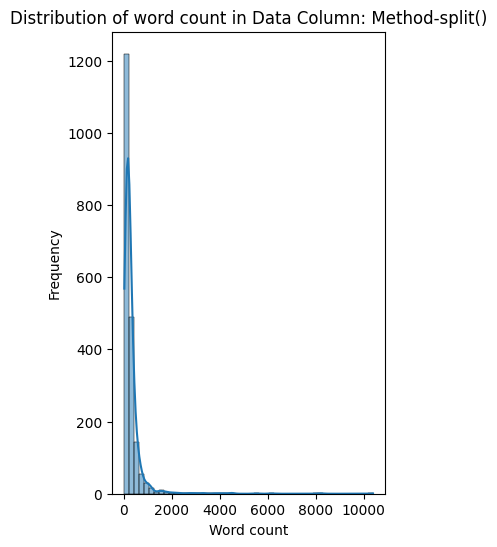

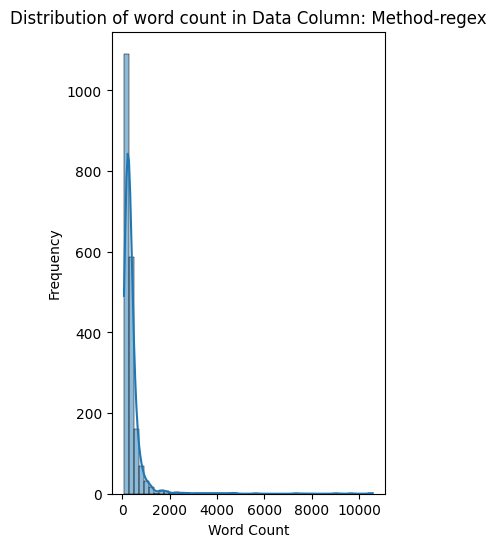

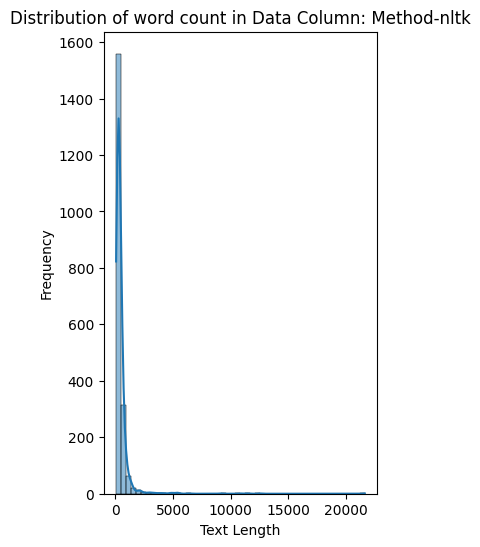

In [12]:
# Visulaize word count: Data column
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(blog['Data_word_count01'], bins=50, kde=True)
plt.title('Distribution of word count in Data Column: Method-split()')
plt.xlabel('Word count')
plt.ylabel('Frequency')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 2)
sns.histplot(blog['Data_word_count02'], bins=50, kde=True)
plt.title('Distribution of word count in Data Column: Method-regex')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 3)
sns.histplot(blog['Data_word_count03'], bins=50, kde=True)
plt.title('Distribution of word count in Data Column: Method-nltk')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
def preprocess(text):
  text = str(text)
  # Regex cleaning
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
  text = re.sub(r'<.*?>', '', text) # Remove HTML
  text = re.sub(r'\d+', '', text) # Remove digits
  text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
  text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces

  # nltk tokenization and stopword removal
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

  # lemmatization: a text pre-processing technique of breaking down words into its root meaning
  # Example: words like 'builds', 'building', 'built' to 'build'
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return tokens

In [15]:
# text pre-processing
blog['tokens_Data'] = blog['Data'].apply(preprocess)
blog['processed_Data'] = blog['tokens_Data'].apply(lambda x: ' '.join(x))
print(blog['processed_Data'][0])

path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowlandrestonansnetagatedocicacukuknetmcsungermanyeunetthothmchpsnidehorusapmchpsnidedsfrank frankdsuucp frank odwyer newsgroups altatheism subject islamic genocide date apr gmt organization siemensnixdorf line distribution world messageid reference nntppostinghost dsapmchpsnide article liveseysolntzewpdsgicom jon livesey writes article frankdsuucp frank odwyer writes article liveseysolntzewpdsgicom jon livesey writes noting particular society case mainland religously motivated murder murder kind say little whether interreligion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates one kill motivates allows christian bible say one may kill certain circumstance fact instructs one kill certain circumstance say majority people moral system instructs kill certain circumstance get distinction motivate allow agree flavour th

* It can be noticed that text processing is done using both Regex and NLTK because Regex is good for pattern recognition where as NLTK is a pre-trained model to understand natural language.

* TF-IDF: Term Frequency - Inverse Document Frequency: A statistical measure that evaluates how important a word is to a document in a collect
* TF = (Number of times a word appears in document) / (Total number of words in document)
* IDF = log(Toal documents / Number of documents containing the word)
* TF-IDF = TF x IDF
* Example:
  * Doc1: "the cat sat on the mat"
  * Doc2: "the dog sat on the log"  
  * Doc3: "the cat chased the dog"

  * Document	the	cat	sat	on	mat	dog	log	chased
  * Doc1	    0.4	0.2	0.2	0.2	0.2	0.0	0.0	0.0
  * Doc2	    0.4	0.0	0.2	0.2	0.0	0.2	0.2	0.0
  * Doc3	    0.4	0.2	0.0	0.0	0.0	0.2	0.0	0.2

* In this example, each word is a feature/column/variable and TF-IDF is calculated for each.
* Note: In the blog dataset used, each entry will be treated as one document each.     

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# TF-IDF vectorization
target_column = 'Labels'
X = blog['processed_Data']
Y = blog[target_column]

In [18]:
# Initialization TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features = 5000,    # Top 5000 features
                                   min_df = 2,             # Ignore terms that appear in less than 2 documents
                                   max_df = 0.95,          # Ignore terms that appear in more than 95% of documents
                                   ngram_range = (1, 2),   # Use both unigrams and bigrams
                                   stop_words = 'english', # Remove English stopwords
                                   sublinear_tf = True)    # Use sublinear TF Scaling

2. Naive Bayes Model for Text Classification
	*	Split the data into training and test sets.
	*	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
	*	Train the model on the training set and make predictions on the test set.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(1600, 5000)
(400, 5000)


Accuracy: 0.9200
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.70      0.78        20
           comp.graphics       0.94      0.85      0.89        20
 comp.os.ms-windows.misc       0.95      1.00      0.98        20
comp.sys.ibm.pc.hardware       0.79      0.95      0.86        20
   comp.sys.mac.hardware       1.00      0.95      0.97        20
          comp.windows.x       0.90      0.90      0.90        20
            misc.forsale       1.00      1.00      1.00        20
               rec.autos       0.95      1.00      0.98        20
         rec.motorcycles       0.95      1.00      0.98        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       1.00      1.00      1.00        20
         sci.electronics       1.00      0.90      0.95        20
                 sci.med       0.95      0.90      0.92   

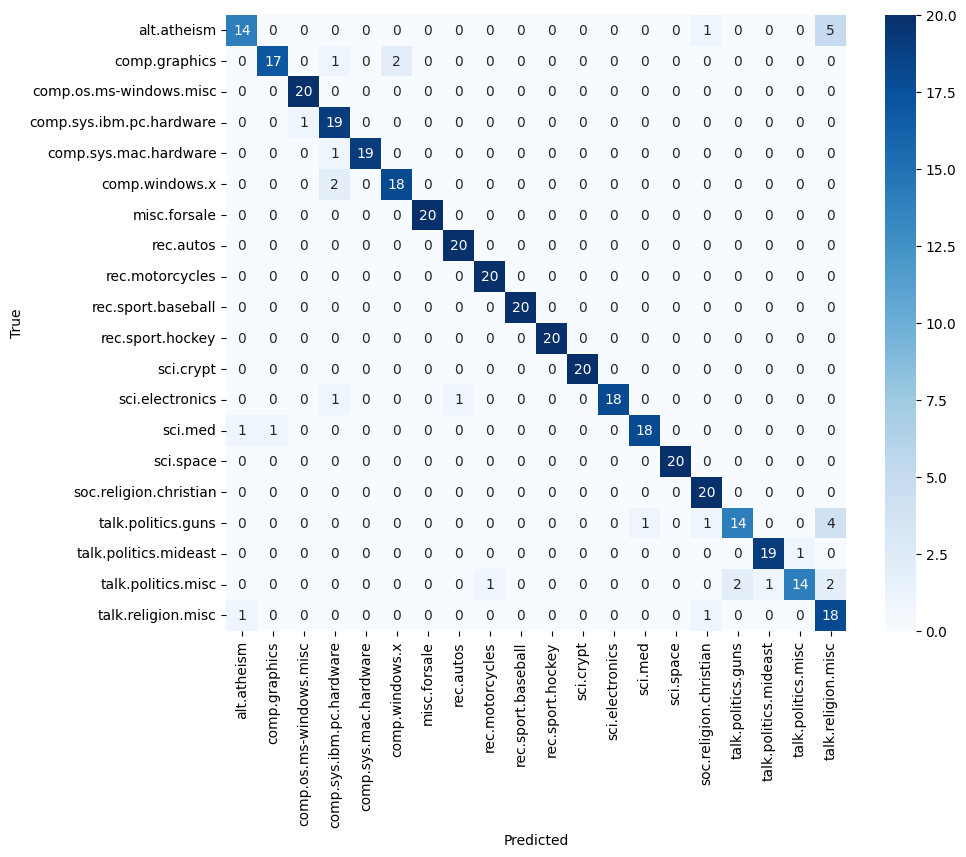

In [21]:
# Implementation of a Naive Bayes classifier
nb_classifier = MultinomialNB(alpha = 1.0)

# Train the model
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize = (10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = nb_classifier.classes_, yticklabels = nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

* The text classification model is performing well with the accuracy of 92% and with balanced precision/recall results across 20 classes.

* It can be noted that the classes atheism, religion, and christian have comparatively low metric scores.

  * This can be due to the fact that these topics have similar vocabulary and the content may be hard-to-classify.

* Higher Recall and lower Precision is generally indicative of over-predicting.

* Overall, 15 out of 20 classes show over 90% precision and recall, with some achieving perfect scores, indicating strong model performance.  

3. Sentiment Analysis
	*	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
	*	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
	*	Examine the distribution of sentiments across different categories and summarize your findings.

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
# Sentiment analysis using vader
def sentiment_analysis_vader(text):
  text = str(text)
  sia = SentimentIntensityAnalyzer()
  sentiment_scores = sia.polarity_scores(text)
  compound_score = sentiment_scores['compound']
  if compound_score >= 0.05:
    sentiment = 'Positive'
  elif compound_score <= -0.05:
    sentiment = 'Negative'
  else:
    sentiment = 'Neutral'
  return sentiment

In [24]:
sentiment_results = blog['Data'].apply(sentiment_analysis_vader)
print(sentiment_results)

0       Negative
1       Positive
2       Negative
3       Negative
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998    Positive
1999    Negative
Name: Data, Length: 2000, dtype: object


In [25]:
sentiment_df = pd.DataFrame({'Sentiment_vader': sentiment_results})
sentiment_df = pd.concat([blog, sentiment_df], axis = 1)
print(sentiment_df)

                                                   Data              Labels  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

      Data_word_count01  Data_word_count02  Data_wo

Text(0, 0.5, 'Count')

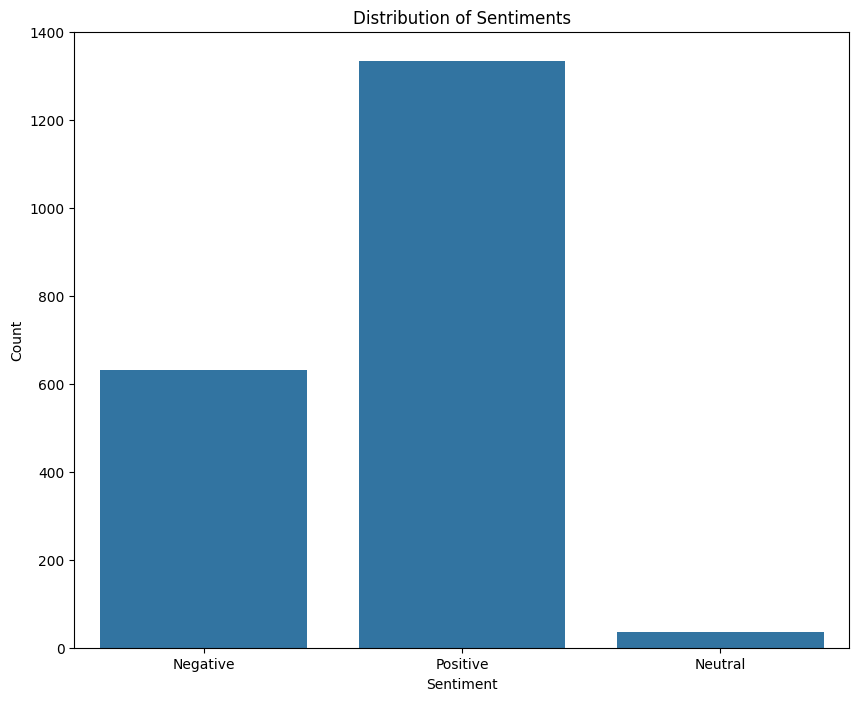

In [26]:
# Distribution of Sentiments
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Sentiment_vader', data = sentiment_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

Labels                    Sentiment_vader
alt.atheism               Positive           57
                          Negative           42
                          Neutral             1
comp.graphics             Positive           83
                          Negative           13
                          Neutral             4
comp.os.ms-windows.misc   Positive           74
                          Negative           24
                          Neutral             2
comp.sys.ibm.pc.hardware  Positive           79
                          Negative           21
comp.sys.mac.hardware     Positive           73
                          Negative           24
                          Neutral             3
comp.windows.x            Positive           78
                          Negative           20
                          Neutral             2
misc.forsale              Positive           85
                          Neutral             8
                          Negative            

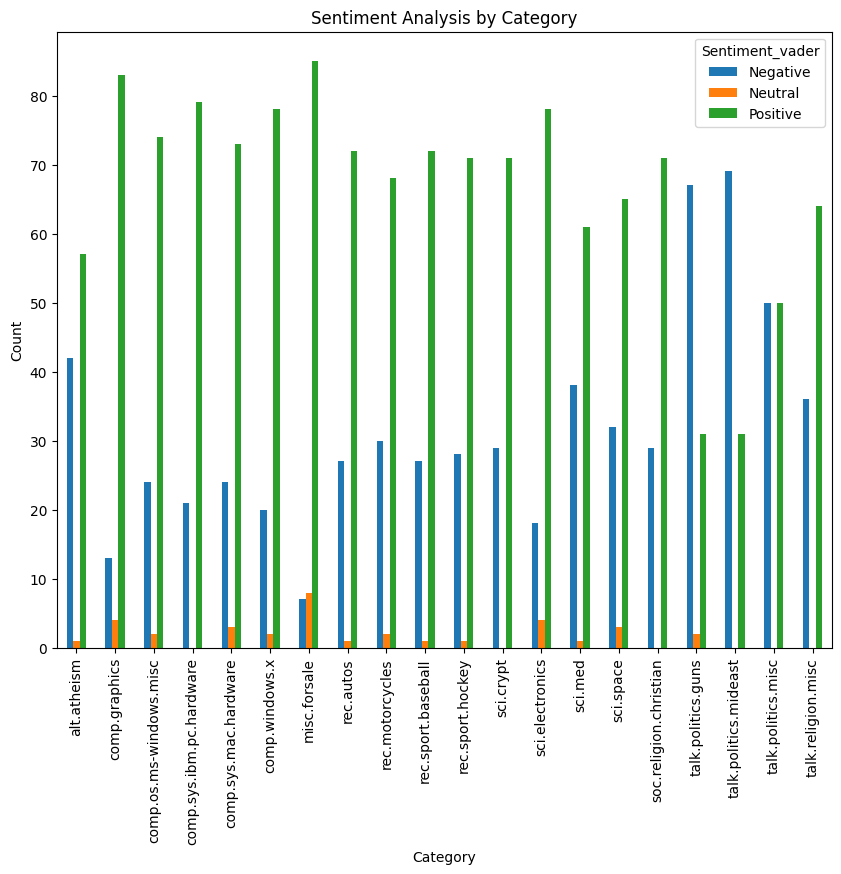

In [27]:
print(sentiment_df.groupby('Labels')['Sentiment_vader'].value_counts())
sentiment_by_category = pd.crosstab(sentiment_df['Labels'], sentiment_df['Sentiment_vader'])
sentiment_by_category.plot(kind = 'bar', figsize = (10, 8))
plt.title('Sentiment Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


* Positive sentiment dominates in most categories (15).
* Negative sentiment dominates in political categories (3).
* Less than 10% neutral sentiment across all catergories.
* In categories like atheism, religion, space and sci.med the negative sentiment is nearly 50% of the positive sentiments.

4. Evaluation
	*	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
	*	Discuss the performance of the model and any challenges encountered during the classification process.
	*	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv = 5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean():.4f}')
print(f'Standard deviation: {cv_scores.std():.4f}')
print(f'Test dataset Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.93125  0.896875 0.93125  0.95     0.94375 ]
Mean accuracy: 0.9306
Standard deviation: 0.0184
Test dataset Accuracy: 0.9200
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.70      0.78        20
           comp.graphics       0.94      0.85      0.89        20
 comp.os.ms-windows.misc       0.95      1.00      0.98        20
comp.sys.ibm.pc.hardware       0.79      0.95      0.86        20
   comp.sys.mac.hardware       1.00      0.95      0.97        20
          comp.windows.x       0.90      0.90      0.90        20
            misc.forsale       1.00      1.00      1.00        20
               rec.autos       0.95      1.00      0.98        20
         rec.motorcycles       0.95      1.00      0.98        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       1.00      1.00      1.00 

Text(0.5, 1.0, 'F1-Scores by Class - Naive Bayes Classifier')

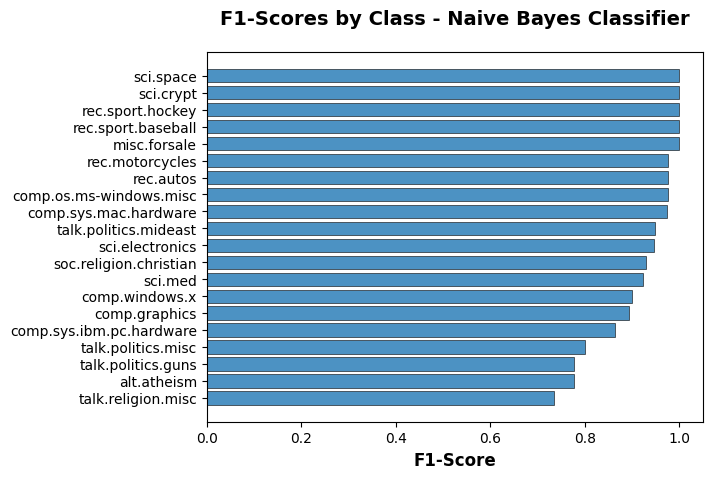

In [37]:
# Get classification report as dictionary
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract F1-scores for each class
f1_scores = {}
for class_name in nb_classifier.classes_:
    f1_scores[class_name] = class_report[class_name]['f1-score']

# Sort classes by F1-score for better visualization
sorted_f1 = dict(sorted(f1_scores.items(), key=lambda item: item[1]))

#print("F1-Scores by Class:")
#for class_name, f1_score in sorted_f1.items():
 #   print(f"{class_name}: {f1_score:.4f}")

# Create horizontal bar chart
bars = plt.barh(range(len(sorted_f1)), list(sorted_f1.values()), alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize the chart
plt.yticks(range(len(sorted_f1)), list(sorted_f1.keys()), fontsize=10)
plt.xlabel('F1-Score', fontsize=12, fontweight='bold')
plt.title('F1-Scores by Class - Naive Bayes Classifier',
          fontsize=14, fontweight='bold', pad=20)

* The Cross-validation accuracy results are in good range and the SD is relatively low. These indicate that the model is accurate and reliable.
* The other metrics also indicate that this text classification model is performing well as only 3 out of 20 classes show lower metrics while 8 out of 20 classes achieve near-perfect classification.
* The model achieves strong results on accuracy, precision, recall, and F1. While most categories are classified with very high F1 (>0.9), a few semantically overlapping political/religious categories have lower F1 less than 0.80 range.

**Scope for improvement**
* Three classes score low on all the measured metrics.
* Political/religious topics are more ambigous.
* Can consider ensemble methods for these categories.